# Transfer Entropy Analysis between Tweets and BTC returns

## Imports

In [131]:
from helpers.transfer_entropy import TweetsToBtcTransferEntropy
from helpers.time_series_labelization import TweetsLabelization, BtcLabelization
import pandas as pd
import numpy as np

#auto reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Grid Search for tresholds

In [132]:
# Define the range of thresholds to search
tweet_thresholds = np.arange(0.1, 0.5, 0.1)
btc_thresholds = np.arange(0.001, 0.01, 0.001)

# Initialize variables to store the best parameters and the highest mean transfer entropy
best_tweet_threshold = None
best_btc_threshold = None
highest_mean_te = -np.inf

# Perform grid search
for tweet_threshold in tweet_thresholds:
    for btc_threshold in btc_thresholds:
        # Labelize the time series data
        tweet_labelizer = TweetsLabelization('clean_data/twitter.parquet')
        btc_labelizer = BtcLabelization('clean_data/btc.parquet')
        tweets_labels = tweet_labelizer.labelize(threshold=tweet_threshold, granularity='h')
        btc_labels = btc_labelizer.labelize(threshold=btc_threshold, granularity='h')

        # Compute the mean transfer entropy
        TE_computer = TweetsToBtcTransferEntropy(tweets_labels, btc_labels)
        mean_te = TE_computer.compute_mean_transfer_entropy(delays=range(0, 25), k=1)

        # Update the best parameters if the current mean transfer entropy is higher
        if mean_te > highest_mean_te:
            highest_mean_te = mean_te
            best_tweet_threshold = tweet_threshold
            best_btc_threshold = btc_threshold

# Print the best parameters and the highest mean transfer entropy
print(f"Best tweet_threshold: {best_tweet_threshold}")
print(f"Best btc_threshold: {best_btc_threshold}")
print(f"Highest mean transfer entropy: {highest_mean_te}")

########## Tweets Labelization ##########
First timestamp: 2017-08-17 05:00:00+00:00
Last timestamp: 2019-11-23 14:00:00+00:00
Number of elements: 19882
Number of NaN: 0
Number of each label: label
1    12188
2     5496
0     2198
Name: count, dtype: int64
########## BTC Labelization ##########
First timestamp: 2017-08-17 05:00:00+00:00
Last timestamp: 2019-11-23 14:00:00+00:00
Number of elements: 19882
Number of NaN: 0
Number of each label: label
2    8221
0    7783
1    3878
Name: count, dtype: int64
########## Tweets Labelization ##########
First timestamp: 2017-08-17 05:00:00+00:00
Last timestamp: 2019-11-23 14:00:00+00:00
Number of elements: 19882
Number of NaN: 0
Number of each label: label
1    12188
2     5496
0     2198
Name: count, dtype: int64
########## BTC Labelization ##########
First timestamp: 2017-08-17 05:00:00+00:00
Last timestamp: 2019-11-23 14:00:00+00:00
Number of elements: 19882
Number of NaN: 0
Number of each label: label
1    7227
2    6474
0    6181
Name: coun

## Time Series Labelization

In [133]:
tweet_labelizer = TweetsLabelization('clean_data/twitter.parquet')
btc_labelizer = BtcLabelization('clean_data/btc.parquet')

In [134]:
tweets_labels = tweet_labelizer.labelize(threshold=0.1, granularity='h')

########## Tweets Labelization ##########
First timestamp: 2017-08-17 05:00:00+00:00
Last timestamp: 2019-11-23 14:00:00+00:00
Number of elements: 19882
Number of NaN: 0
Number of each label: label
1    12188
2     5496
0     2198
Name: count, dtype: int64


In [135]:
btc_labels = btc_labelizer.labelize(threshold=0.008, granularity='h')

########## BTC Labelization ##########
First timestamp: 2017-08-17 05:00:00+00:00
Last timestamp: 2019-11-23 14:00:00+00:00
Number of elements: 19882
Number of NaN: 0
Number of each label: label
1    15712
2     2131
0     2039
Name: count, dtype: int64


## Transfer Entropy Analysis

In [136]:
TE_computer = TweetsToBtcTransferEntropy(tweets_labels, btc_labels)

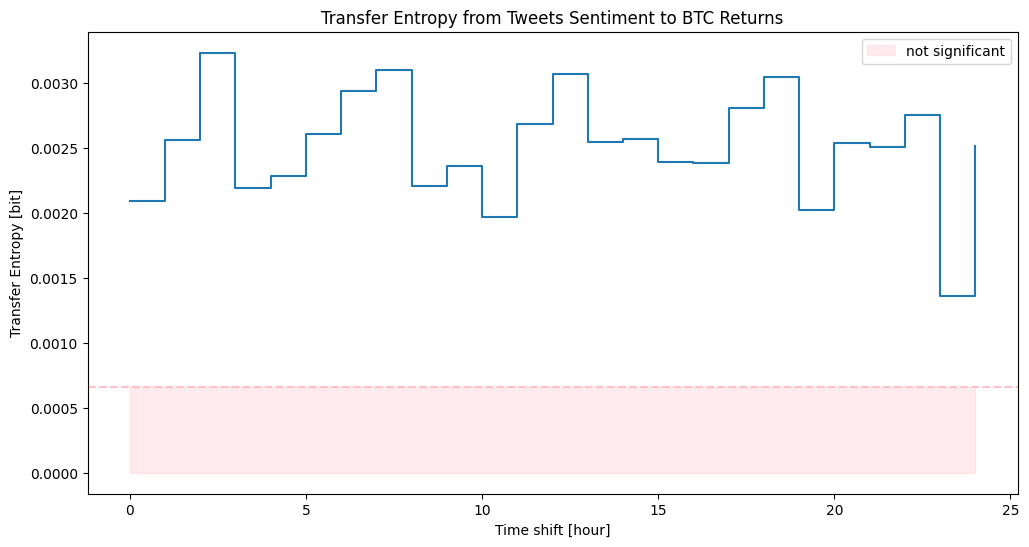

In [137]:
TE_computer.plot_transfer_entropy_on_lags(delays=range(0, 25), k=1, moving_average_window=0)

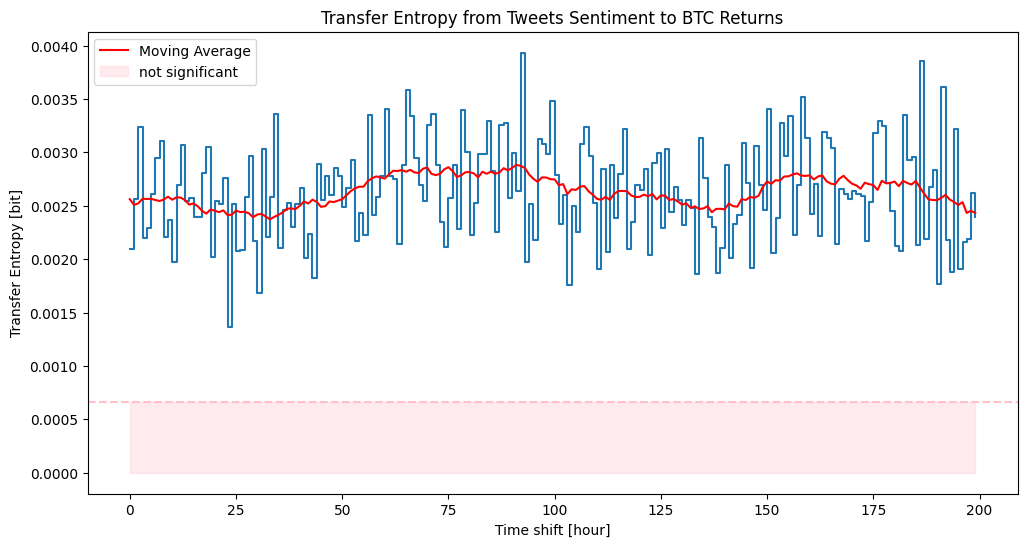

In [138]:
TE_computer.plot_transfer_entropy_on_lags(delays=range(0, 200), k=1, moving_average_window=20)

## Time Series Labelization

In [111]:
tweet_labelizer = TweetsLabelization('clean_data/twitter.parquet')
btc_labelizer = BtcLabelization('clean_data/btc.parquet')

In [112]:
tweets_labels = tweet_labelizer.labelize(threshold=0.2, granularity='d')

########## Tweets Labelization ##########
First timestamp: 2017-08-17 00:00:00+00:00
Last timestamp: 2019-11-23 00:00:00+00:00
Number of elements: 829
Number of NaN: 0
Number of each label: label
1    424
2    356
0     49
Name: count, dtype: int64


In [113]:
btc_labels = btc_labelizer.labelize(threshold=0.02, granularity='d')

########## BTC Labelization ##########
First timestamp: 2017-08-17 00:00:00+00:00
Last timestamp: 2019-11-23 00:00:00+00:00
Number of elements: 829
Number of NaN: 0
Number of each label: label
1    445
2    199
0    185
Name: count, dtype: int64


## Transfer Entropy Analysis

In [114]:
TE_computer = TweetsToBtcTransferEntropy(tweets_labels, btc_labels)

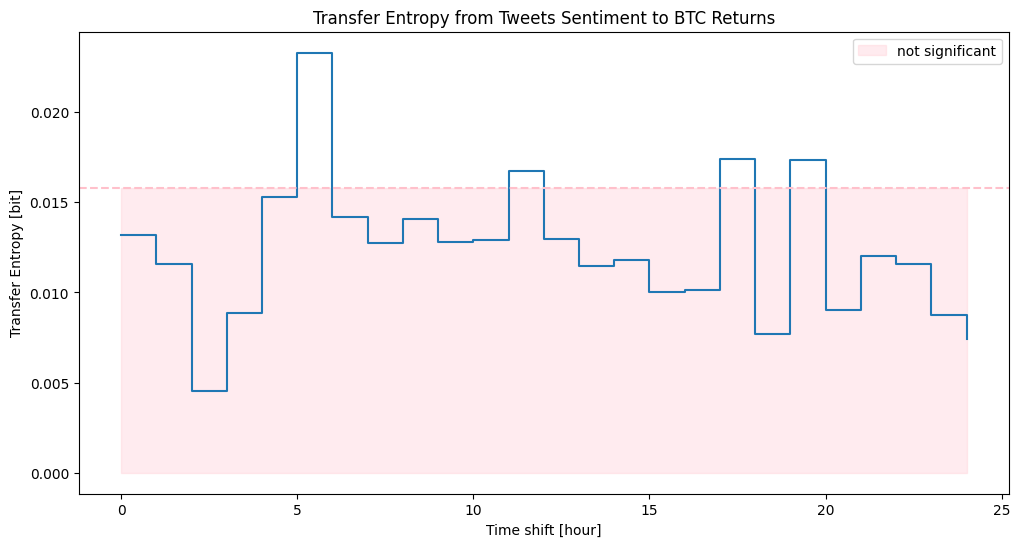

In [115]:
TE_computer.plot_transfer_entropy_on_lags(delays=range(0, 25), k=1, moving_average_window=0)

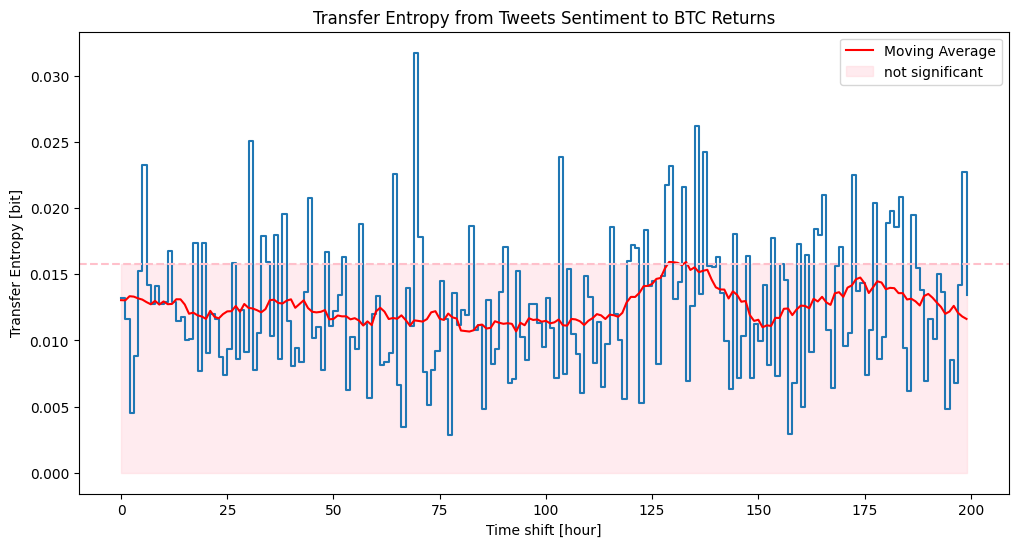

In [116]:
TE_computer.plot_transfer_entropy_on_lags(delays=range(0, 200), k=1, moving_average_window=20)